# Fraud Detection Project
## Exploratory Data Analysis

**Data Description**
- This project uses credit card data from Kaggle obtained from <https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data>
- Relevant information about the data from Kaggle:
    - The dataset contains credit card transactions made in two days
    - There are 492 fraudulent transactions out of 284,807 transactions
    - Covariates V1, V2, … , and V28 are principal components obtained with PCA transformation (original variables unavailbale due to confidentiality)
    - 'Time' and 'Amount' have not been transformed with PCA
    - 'Time' stands for the seconds elapsed between each transaction and the first transaction in the dataset
    - 'Amount' shows transaction amount
    - 'Class' is the label (1 = fraud, 0 = not fraud)
- Because V1-V28 are transformed with PCA, they should be uncorrelated, and should represent most of the variation among records with respect to variables fed into PCA
- 'Class', 'Time', and 'Amount' are assumed to have been not used in PCA

**Steps**
- In this notebook, I will take an initial look at the data and do some exploratory data analysis (EDA) including:
    - Visualizations of data
    - Descriptive statistics

In [1]:
#Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')
%matplotlib inline

In [2]:
#Read in the .csv file from Kaggle and save the data as df
df = pd.read_csv('../data/creditcard.csv')

In [3]:
#Check the head of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Check information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- There are 284807 records and 31 columns
- There is no missingness

In [5]:
# 4. Check for missing or duplicate values
print("Missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values: 0
Duplicate rows: 1081


- This confirms no missing values
- This shows that there are 1081 duplicate rows, but I cannot say for sure that these are duplicate transactions because there is no unique identifier. Based on the description of this dataset, I assume each transaction is unique, but these "duplicates" happened to have the same values in these columns

In [6]:
#Check the descriptive statistics of the data
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


- The majority of transactions is non-fraudulent
- Distributions of V1-V28 make sense given that these are principal components of PCA
- The majority of transactions are smaller purchases (< $78)
- The max of time makes sense (172792.00 seconds is about 48 hours) because these transactions took place over two days

In [7]:
#Get the counts of fraudulent and legitimate transactions by checking the frequency of column 'Class'
print(f"Frequency of 'Class' column \n{df['Class'].value_counts()}")
print('\n')
print('Proportion of fraud cases: {: .6f}'.format(df['Class'].mean()))

Frequency of 'Class' column 
Class
0    284315
1       492
Name: count, dtype: int64


Proportion of fraud cases:  0.001727


There are 492 fraudulent transactions and 284315 legitimate transactions. This is a very imbalanced dataset

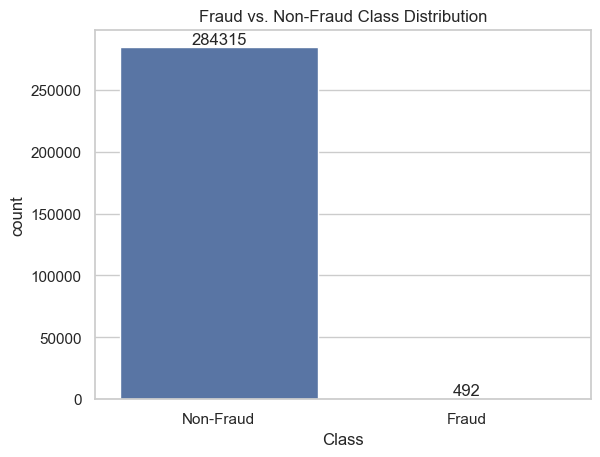

In [8]:
#Visualize the frequency of 'Class' column
ax = sns.countplot(data = df, x = 'Class')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Fraud vs. Non-Fraud Class Distribution')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])

plt.show()

- Consistent with previous observations, the number of fraudulent transactions is much smaller than the number of legitimate transactions, indicating imbalanced data

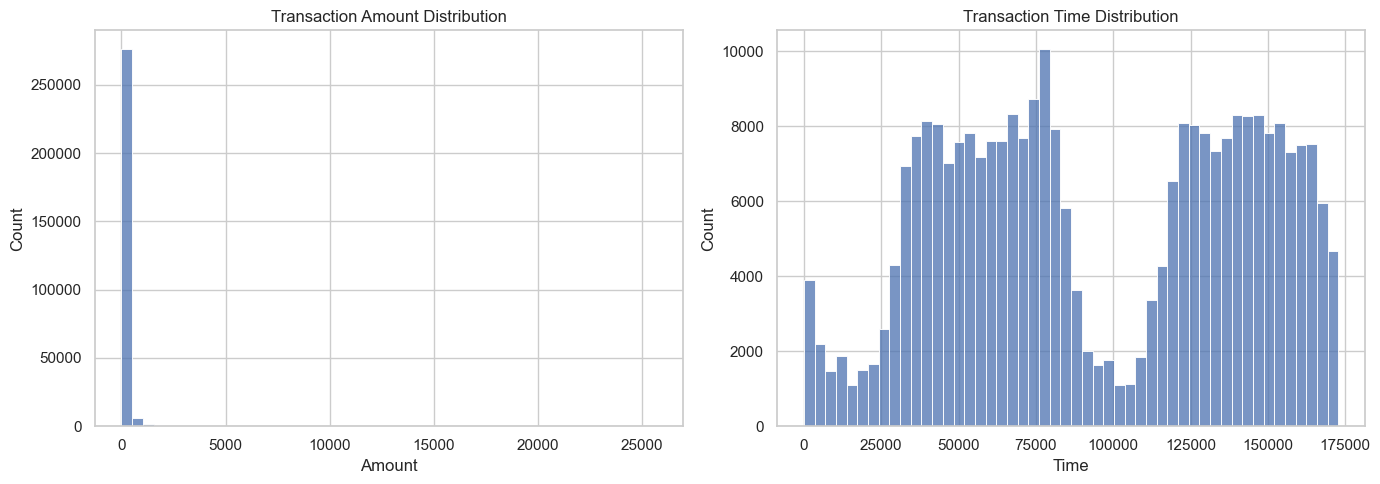

In [111]:
#Distribution of 'Amount' and 'Time'
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Amount'], bins=50, ax=axs[0], kde=False)
axs[0].set_title('Transaction Amount Distribution')

sns.histplot(df['Time'], bins=50, ax=axs[1], kde=False)
axs[1].set_title('Transaction Time Distribution')

plt.tight_layout()
plt.show()

- Since 'Amount' is skewed to the right, I will apply log transformation and consider using RobustScaler() in the preprocessing step

- 'Time' appears to have two modes (bimodal) and it is not normally distributed. Note, however, that 'Time' does not represent time on a clock but represents the time elapsed since the first transaction. I may consider dropping this from the analysis unless new data points for which I want to make predictions are always accompanied by 'Time' variable defined the same way, or I can engineer a feature that makes sense. If I find a model that performs well without this variable, I may drop this variable completely

In [9]:
df['Amount'].min()

0.0

In [10]:
#Log transform the 'Amount'
#Since the min of Amount is 0, use ln(1+x)
df['Log_Amount'] = np.log1p(df['Amount'])

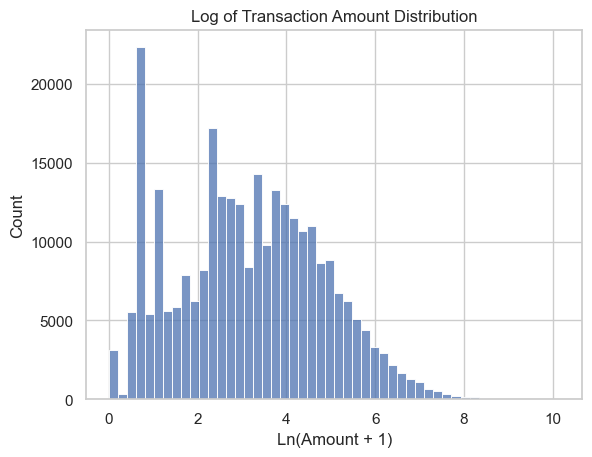

In [11]:
#Distribution of 'Log_Amount'
ax = sns.histplot(df['Log_Amount'], bins=50)
ax.set_title('Log of Transaction Amount Distribution')
plt.xlabel('Ln(Amount + 1)')
plt.show()

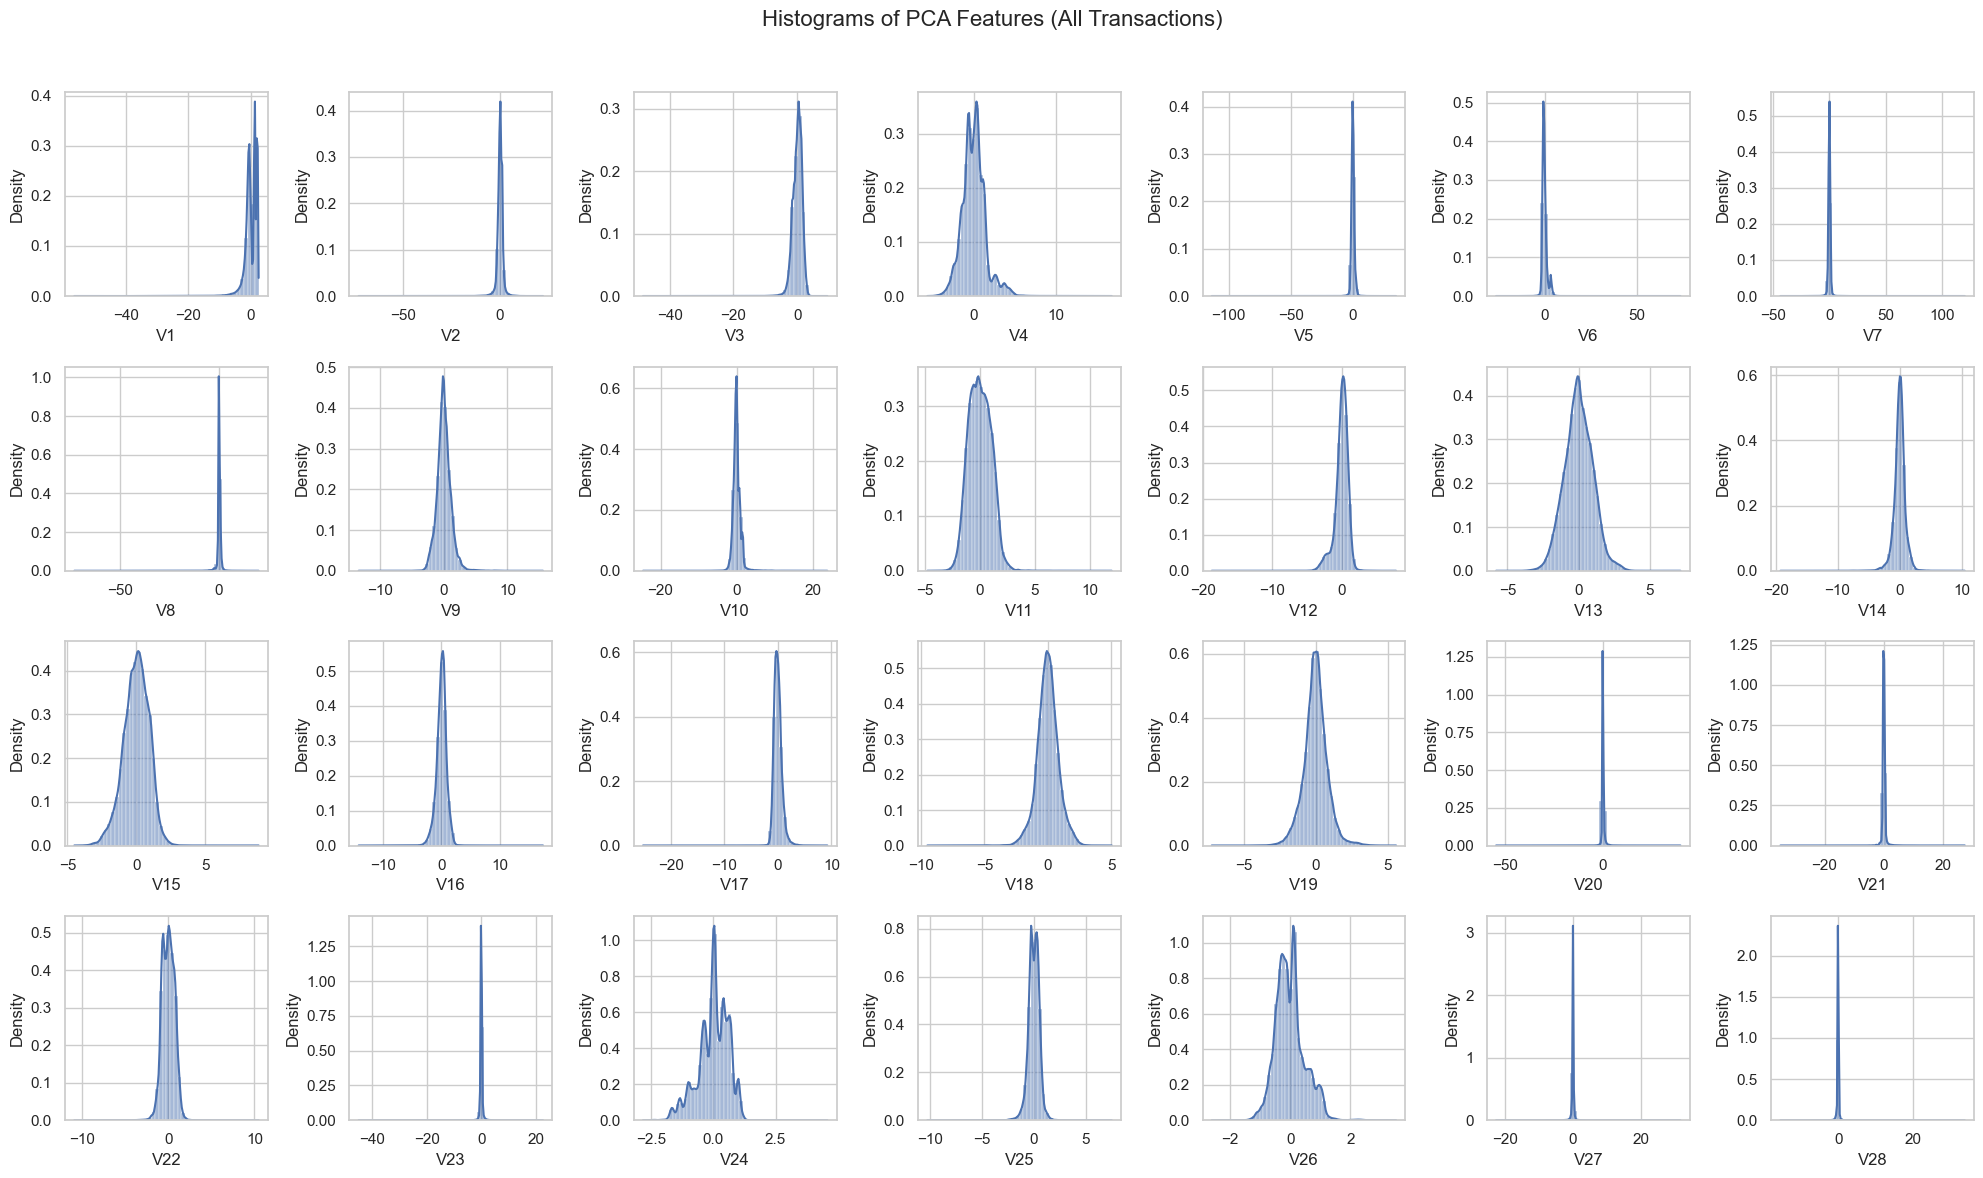

In [12]:
#Distribution of PCA components (V1-V28)
features = [f'V{i}' for i in range(1,29)]
rows, cols = 4,7
fig, axes = plt.subplots(rows, cols, figsize = (20,12))
fig.suptitle('Histograms of PCA Features (All Transactions)', fontsize=16)

for i, feature in enumerate(features):
    r, c = divmod(i, cols)    
    sns.histplot(data=df, x = feature, ax=axes[r][c], bins=50, stat = 'density', kde=True)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

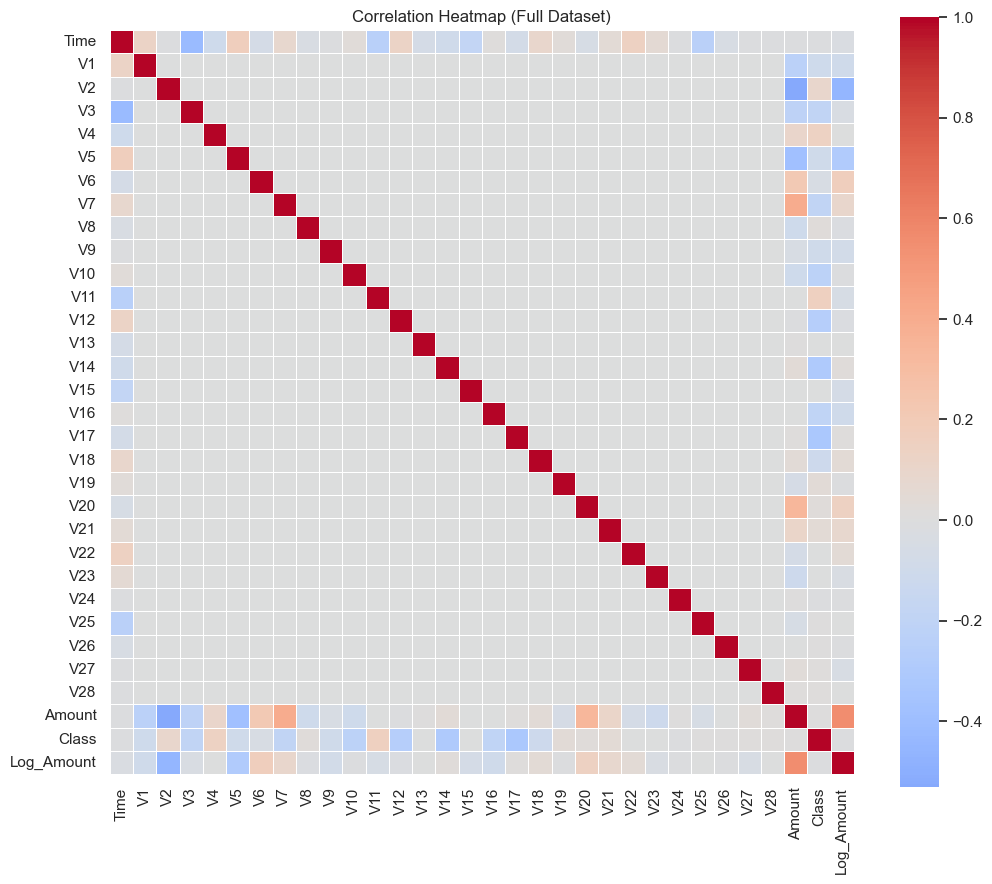

In [13]:
#Correlation heatmap (focus on fraud class)
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Full Dataset)')
plt.show()

- V1-V28 do not show correlations with one another as expected

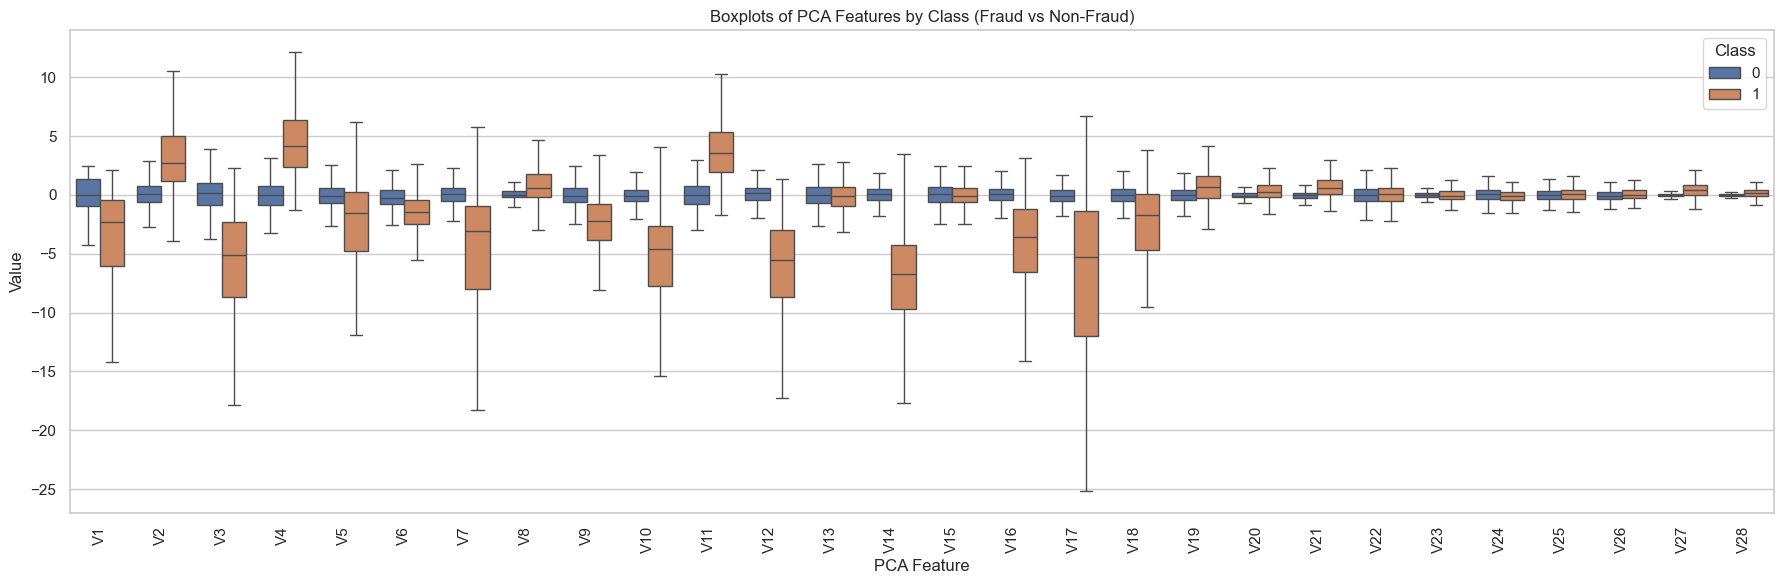

In [33]:
#Boxplots of PCA components by Class
#Make df long
df_melted = df.melt(id_vars='Class', value_vars=[f'V{i}' for i in range(1, 29)],
                    var_name='PCA Feature', value_name='Value')

#Create boxplots for each PCA component by Class side-by-side (without outleirs)
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_melted, x='PCA Feature', y='Value', hue='Class', showfliers=False)
plt.title('Boxplots of PCA Features by Class (Fraud vs Non-Fraud)')
plt.xticks(rotation=90)
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

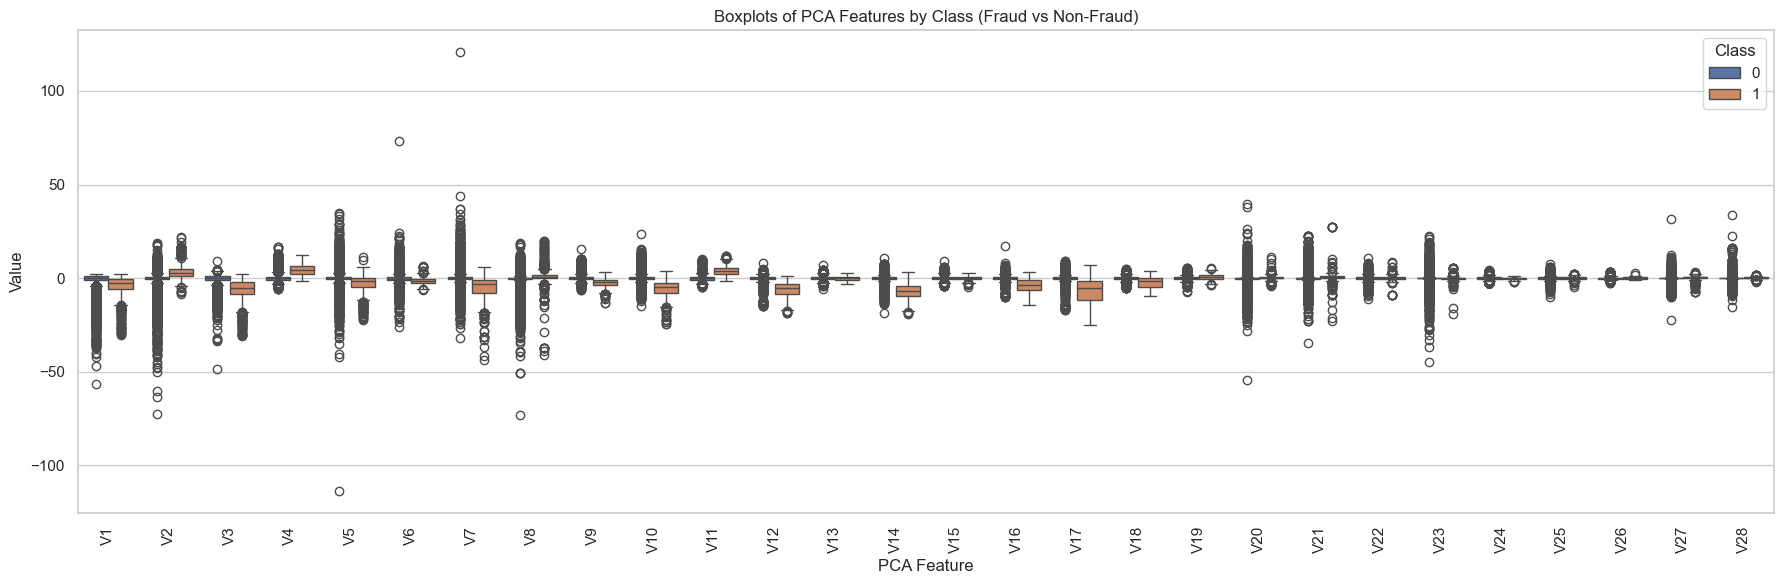

In [34]:
#Create boxplots for each PCA component by Class side-by-side (WITH outleirs)
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_melted, x='PCA Feature', y='Value', hue='Class')
plt.title('Boxplots of PCA Features by Class (Fraud vs Non-Fraud)')
plt.xticks(rotation=90)
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

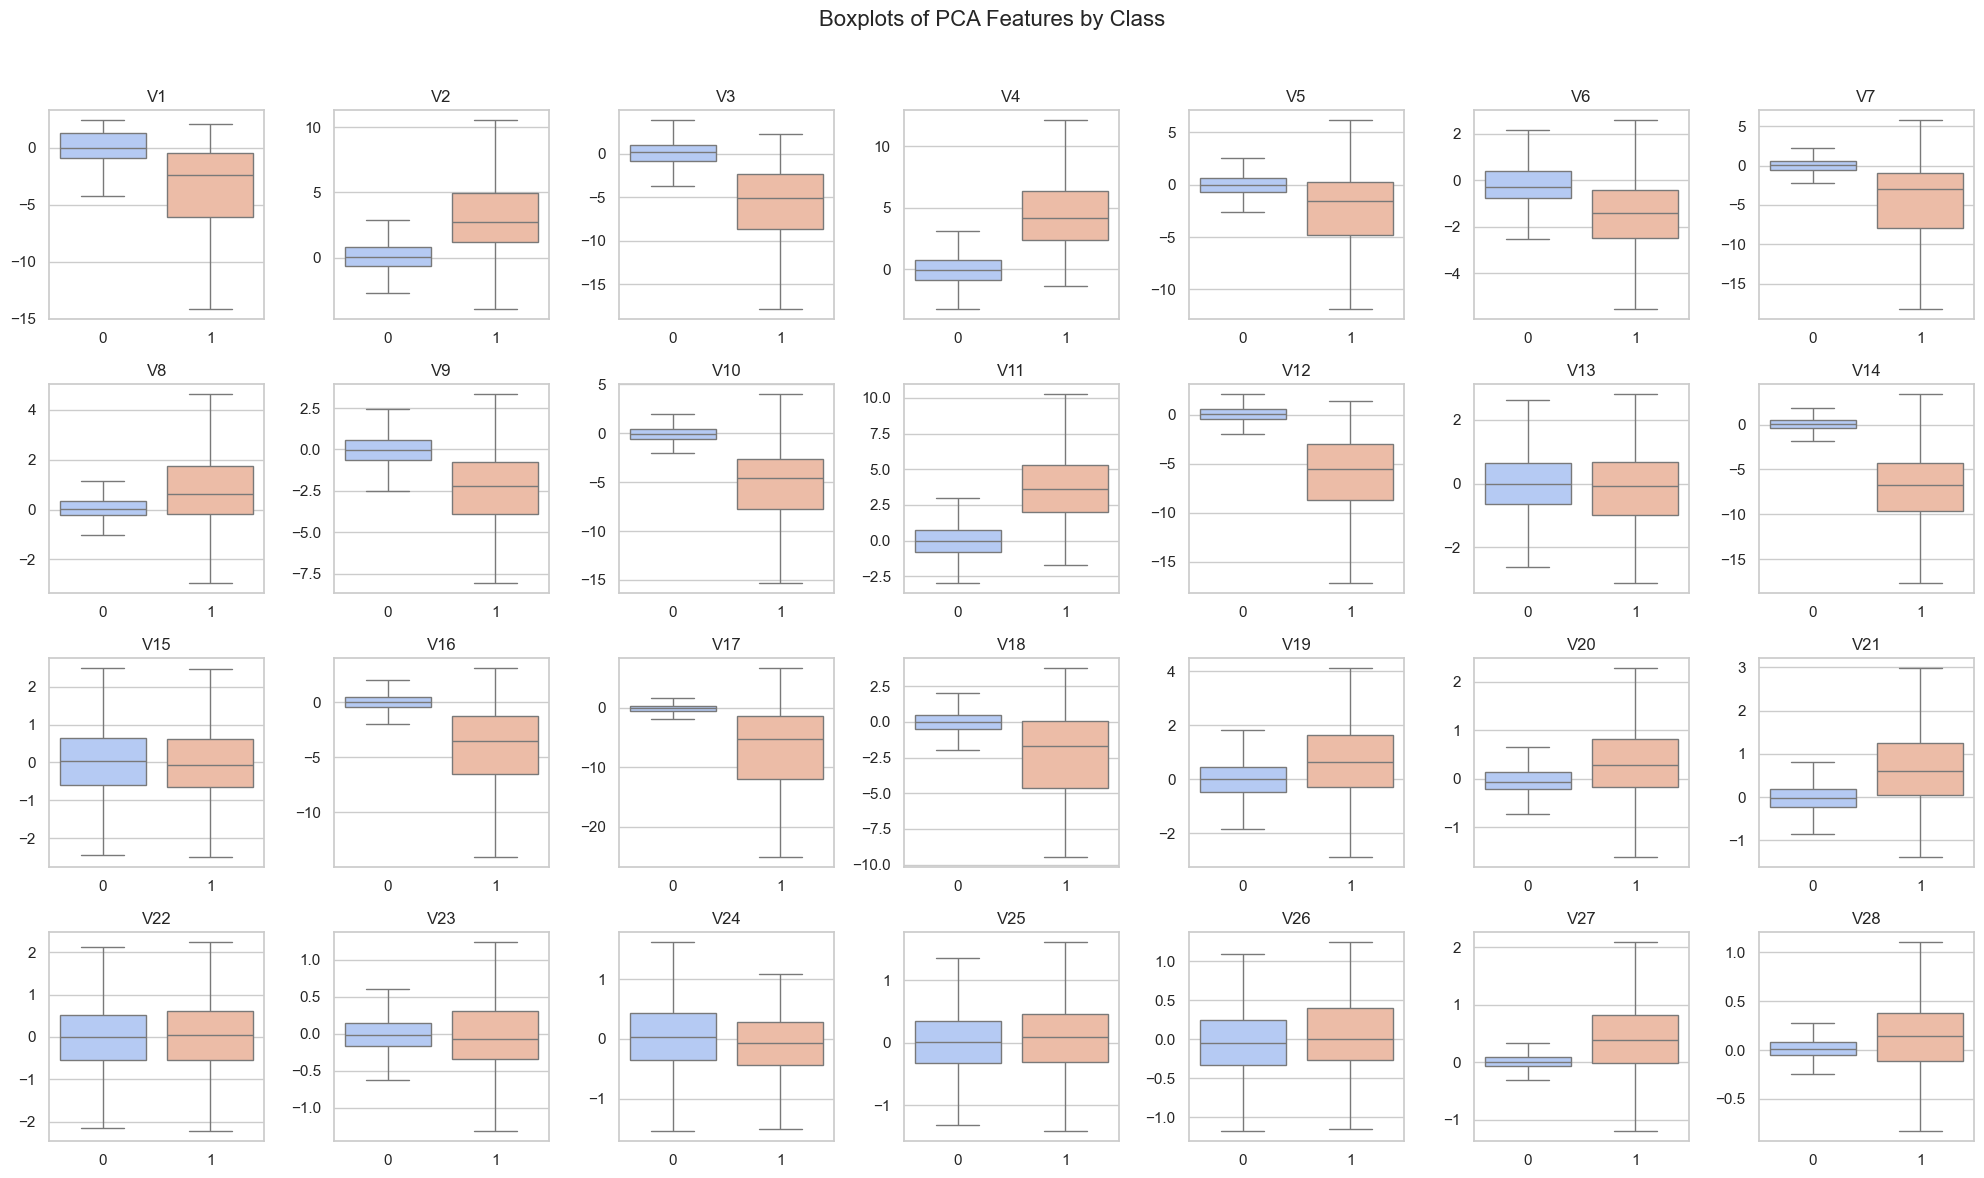

In [25]:
#Faceted boxplots to look more closely at individual plots
#7 plots per line
#Without outliers
features = [f'V{i}' for i in range(1, 29)]
rows, cols = 4, 7
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Boxplots of PCA Features by Class', fontsize=16)

for i, feature in enumerate(features):
    r, c = divmod(i, cols)
    sns.boxplot(ax=axes[r][c], data=df, x='Class', hue = 'Class', legend = False, palette='coolwarm', y=feature, showfliers=False)
    axes[r][c].set_title(feature)
    axes[r][c].set_xlabel('')
    axes[r][c].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

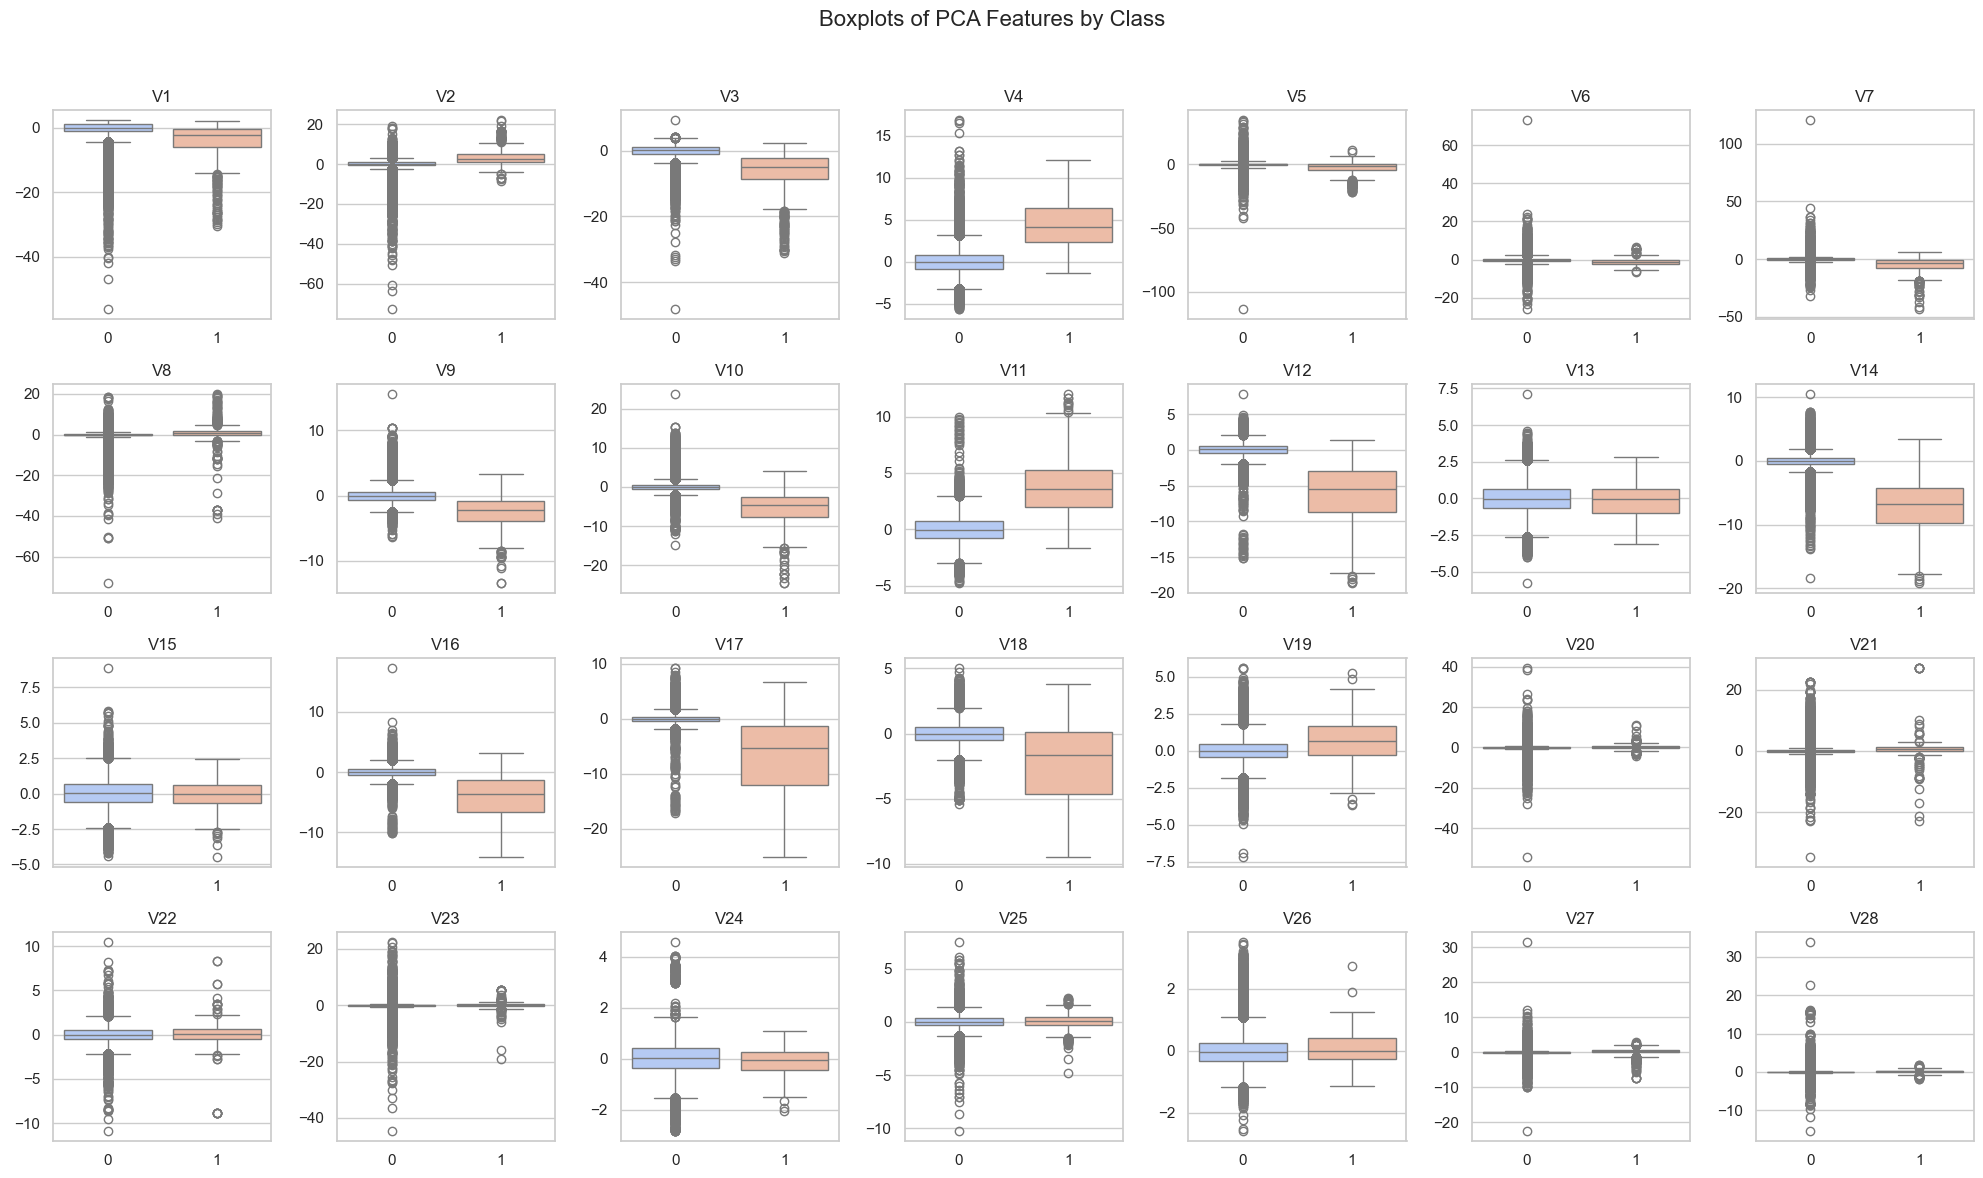

In [27]:
#Faceted boxplots to look more closely at individual plots
#7 plots per line
#WITH outliers
features = [f'V{i}' for i in range(1, 29)]
rows, cols = 4, 7
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Boxplots of PCA Features by Class', fontsize=16)

for i, feature in enumerate(features):
    r, c = divmod(i, cols)
    sns.boxplot(ax=axes[r][c], data=df, x='Class', hue = 'Class', legend = False, y=feature, palette='coolwarm')
    axes[r][c].set_title(feature)
    axes[r][c].set_xlabel('')
    axes[r][c].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

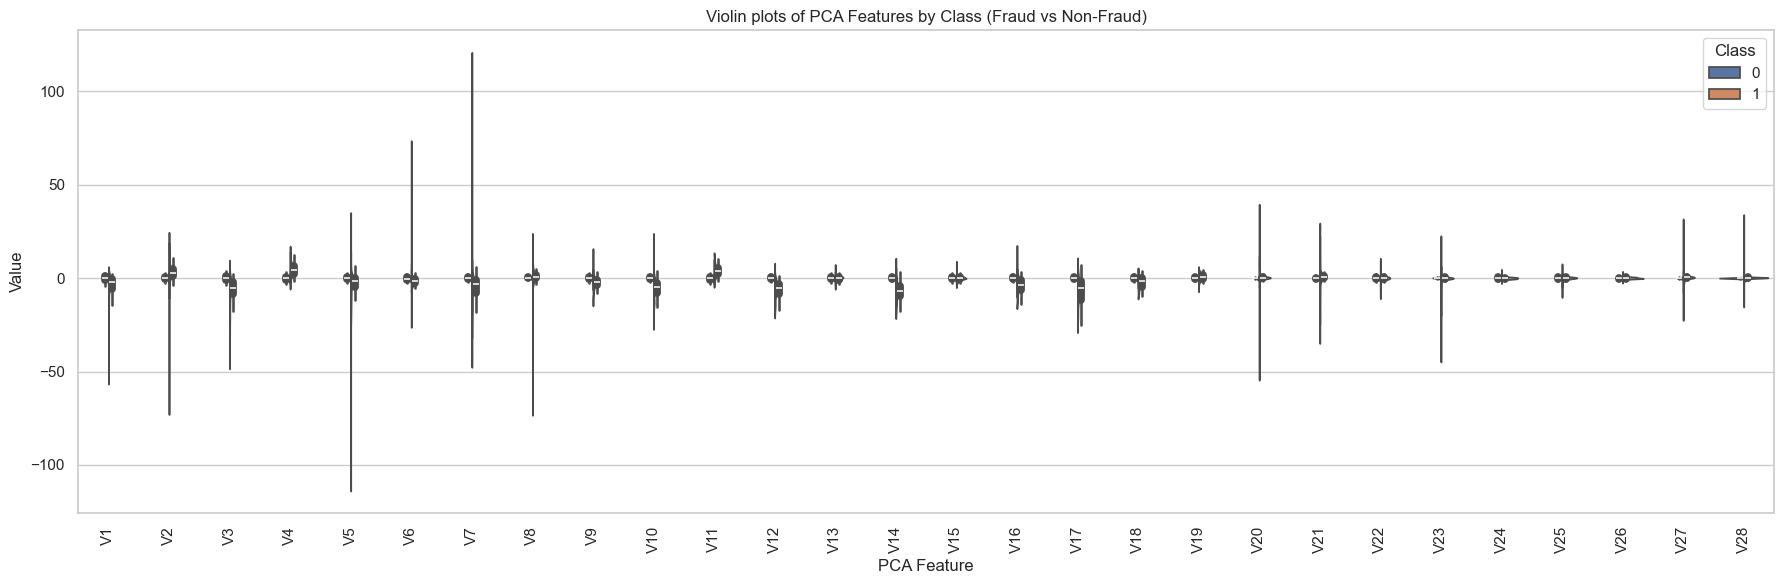

In [35]:
#Violin plots of PCA components by Class
plt.figure(figsize=(18, 6))
sns.violinplot(data=df_melted, x='PCA Feature', y='Value', hue='Class', split=True)
plt.title('Violin plots of PCA Features by Class (Fraud vs Non-Fraud)')
plt.xticks(rotation=90)
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

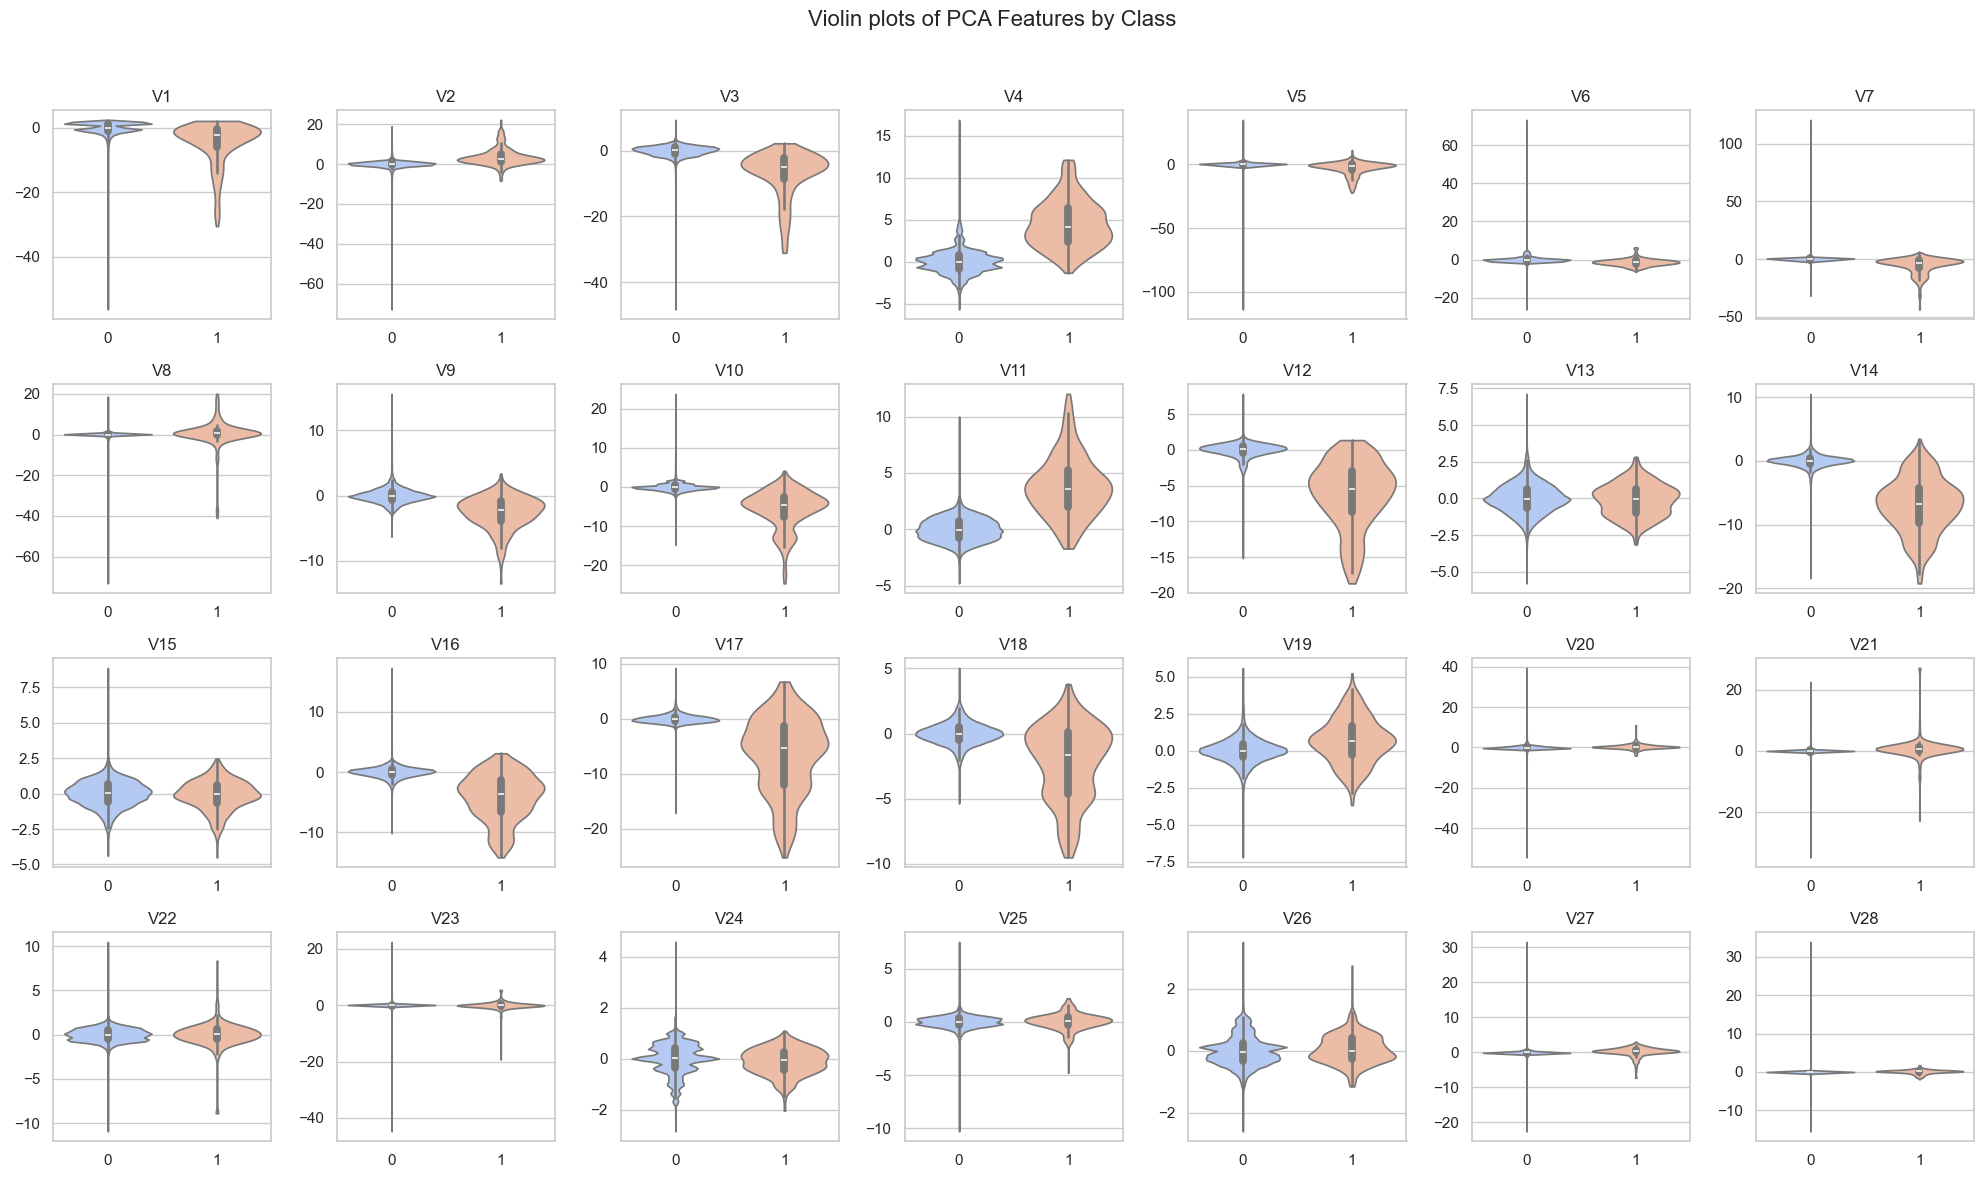

In [28]:
#Faceted violin plots
features = [f'V{i}' for i in range(1, 29)]
rows, cols = 4, 7
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Violin plots of PCA Features by Class', fontsize=16)

for i, feature in enumerate(features):
    r, c = divmod(i, cols)
    sns.violinplot(ax=axes[r][c], data=df, x='Class', y=feature, hue = 'Class', legend = False, palette='coolwarm', cut=0)
    axes[r][c].set_title(feature)
    axes[r][c].set_xlabel('')
    axes[r][c].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Based on the box plots and violin plots, distributions of some features (V1, V2, V3, V4, V9, V10, V11, V12, V14, V16, V17, V18, possibly also V5-V8) appear different between fraud and non-fraud transactions
- I am going to skip formal statistical testing because the plan is to use all these variables in the ML model in the future step anyway

In [36]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974596 entries, 0 to 7974595
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Class        int64  
 1   PCA Feature  object 
 2   Value        float64
dtypes: float64(1), int64(1), object(1)
memory usage: 182.5+ MB


In [38]:
#df_melted.groupby('PCA Feature').count()

In [39]:
#df_melted.head(1000000)

In [40]:
#Visualize PCA features with t-SNE (t-distributed Stochastic Neighbor Embedding)
#Reduce the dimensionality of the PCA features while keeping similar points close to one another
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
#Take a subsample for speed
#Subsample with stratification = Class to preserve the ratio of fraud vs non-fraud
X_sub, _, y_sub, _ = train_test_split(
    X_scaled, y, 
    train_size=150000, 
    stratify=y, 
    random_state=42
)

In [42]:
#Check that the proportions of Class = 0 and 1 in the full sample and the subsample are close
#Multiply by 100 because the fraction is too small
print(df['Class'].value_counts(normalize = True) * 100)
print('\n')
print(y_sub.value_counts(normalize = True) * 100)

Class
0   99.83
1    0.17
Name: proportion, dtype: float64


Class
0   99.83
1    0.17
Name: proportion, dtype: float64


- Proportions are the same when rounded to two decimal places

In [43]:
df.shape

(284807, 32)

In [44]:
#Check how many fraud cases are in the subsample
print(y_sub.value_counts())

Class
0    149741
1       259
Name: count, dtype: int64


In [45]:
#Fit TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sub)

In [46]:
X_tsne.shape

(150000, 2)

In [47]:
X_tsne[:10,]

array([[ -24.148737 , -111.77277  ],
       [ -48.061207 ,  -65.145454 ],
       [ -80.359505 ,   30.169638 ],
       [  30.153797 ,    5.5321198],
       [ -87.49406  ,   23.550186 ],
       [  13.678377 ,  -37.494904 ],
       [  18.284803 ,   32.74917  ],
       [  88.4137   ,   -8.526674 ],
       [   7.019517 ,  -28.716263 ],
       [  42.491894 ,   -4.6758037]], dtype=float32)

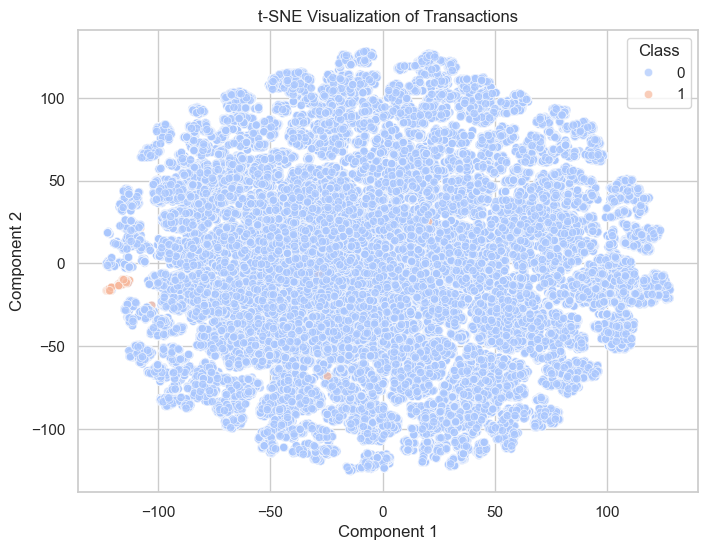

In [48]:
#Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_sub, palette='coolwarm', alpha=0.7)
plt.title('t-SNE Visualization of Transactions')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class')
plt.show()

- From the t-SNE of subsample, many of the fraud cases seem similar, but not all

In [56]:
#Check how much variance is captured by each PCA component
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df[[f'V{i}' for i in range(1, 29)]])
explained_variance = pca.explained_variance_ratio_
cum_var = explained_variance.cumsum()

In [57]:
cum_var

array([0.12483757, 0.21356702, 0.28837636, 0.35360784, 0.41559829,
       0.47335421, 0.52315273, 0.56956969, 0.60884466, 0.64742333,
       0.68132481, 0.71381239, 0.7460451 , 0.77594586, 0.80320759,
       0.82819207, 0.85166522, 0.87452552, 0.89608823, 0.91542731,
       0.93298321, 0.95011992, 0.96280874, 0.97474451, 0.9835865 ,
       0.99115334, 0.99645466, 1.        ])

**Next Step**
- Preprocessing of the data is the next step
- Since V1-V28 are PCA components, they are independent from one another which was also shown in the heatmap. Since original variables were not provided, I do not plan to apply further preprocessing to V1-V28
- I also plan to use all PCA components in models unless model fitting needs to be sped up or the models are overfitting. If I need to drop some components, the last few components may be ok to drop based on how much variance is captured by the other components
- Since 'Amount' is right skewed, I will log transform and apply RobustScaler
- I will likely drop 'Time'
- The dataset is quite imbalanced so I will address that issue in preprocessing as well